# Aula 5 - Técnicas de Classificação

## 28/09 - Técnicas de Classificação
## 05/10 - Métricas

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
# Holdout
from sklearn.model_selection import train_test_split
# Normalzação
from sklearn.preprocessing import StandardScaler
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Métricas
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Dados

In [5]:
df = pd.read_csv("winequality-red-class.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bom
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Ruim


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  class                 1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [8]:
df["class"].value_counts()

Bom     855
Ruim    744
Name: class, dtype: int64

# Dividindo o Datasete em Conjunto de Treinamento e Teste

In [10]:
# Separar X e Y

X = df.drop("class", axis = 1)
Y = df["class"]

In [11]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
Y.head()

0    Ruim
1    Ruim
2    Ruim
3     Bom
4    Ruim
Name: class, dtype: object

In [13]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [15]:
y_train.head()

493     Bom
354     Bom
342     Bom
834    Ruim
705    Ruim
Name: class, dtype: object

In [17]:
len(y_train) #80% da base totoal

1279

# Normalizando

In [19]:
scaler = StandardScaler()
scaler.fit(X_train) #Compute the mean and std to be used for later scaling.

StandardScaler()

In [20]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [23]:
pd.DataFrame(X_train_norm)

,0,1,2,3,4,5,6,7,8,9,10
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.450408,0.387494,-1.394630,-0.456703,-0.617442,-1.054958,-1.113215,0.499144,-0.855116,-0.172018,-0.017201
1275,-0.071764,0.582801,-0.882784,-0.317352,-0.313264,0.885003,0.405199,-0.212363,-0.140623,0.515517,0.457957
1276,-0.651956,0.499098,-1.087522,0.100700,-0.232149,-0.084978,1.164407,0.369779,1.288361,-0.687670,-0.872484
1277,-0.245822,-1.844584,0.396831,-0.596054,-0.698557,-0.860962,-0.961374,-1.182601,0.054238,0.801991,1.408272


In [22]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


> Normalização produz um conjutno total de Média = 0 e Std = 1

 Obs: Maior Quantidade de Dados resulta em dados mais precisos. 

In [26]:
print("X_Train_norm: ", X_train_norm.mean(), ",", X_train_norm.std() )
print("X_Test_norm: ", X_test_norm.mean(), ",", X_test_norm.std() )


X_Train_norm:  2.3117007159413737e-15 , 1.0
X_Test_norm:  -0.0395045795329344 , 0.9808843867859517


# Classificação

## Decision Tree

> ❗️ Antes de mostrar cada técnica, abrir a Página do Sklearn e apresentar de maneira breve, onde é possível encontrar os parâmetros, exemplo de utilização, e até a teoria caso seje necessário.

In [27]:
dt = DecisionTreeClassifier(max_depth = 5) #Constroi o classificador 

In [28]:
# Treinamento do Classificador (Utilizar o método .fit)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
# Predições
pred_dt =dt.predict(X_test) ##Conjunto de Teste para predições

In [31]:
pred_dt

array(['Ruim', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim',
       'Bom', 'Bom', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Bom',
       'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom',
       'Bom', 'Bom', 'Ruim', 'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Ruim',
       'Ruim', 'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Ruim',
       'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Bom', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Bom',
       'Ruim', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom',
       'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Bom', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Ruim', 'Bom', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim',
       'Bom', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom', 'Bom', 'Bom',
       'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim',
       'Bom', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Bom'

> ❗️ Como explicar a arvore plotada: 

- Esquerda = Verdadeiro | Direira = Falso
- Gini = Impureza do nó. "Um nó é puro Gini = 0, se todas as instâncias de treinamento pertencem a mesma classe que se aplica"; Ou seja, um nó puro tem Gi = 0, pois existe apenas 1 classe presente neste nó. Quanto mais classes presente, mais impuro é. 
- Value: Quantas instâncias de cada classe esse nó de aplica.  [BOM, RUIM]
- Samples: Quantidade de instâncias de treinamento que se aplica (Soma Values)

O DT seleciona os atributos conforme o calculo da impureza e valor médio entre as instâncias dos atributos. 


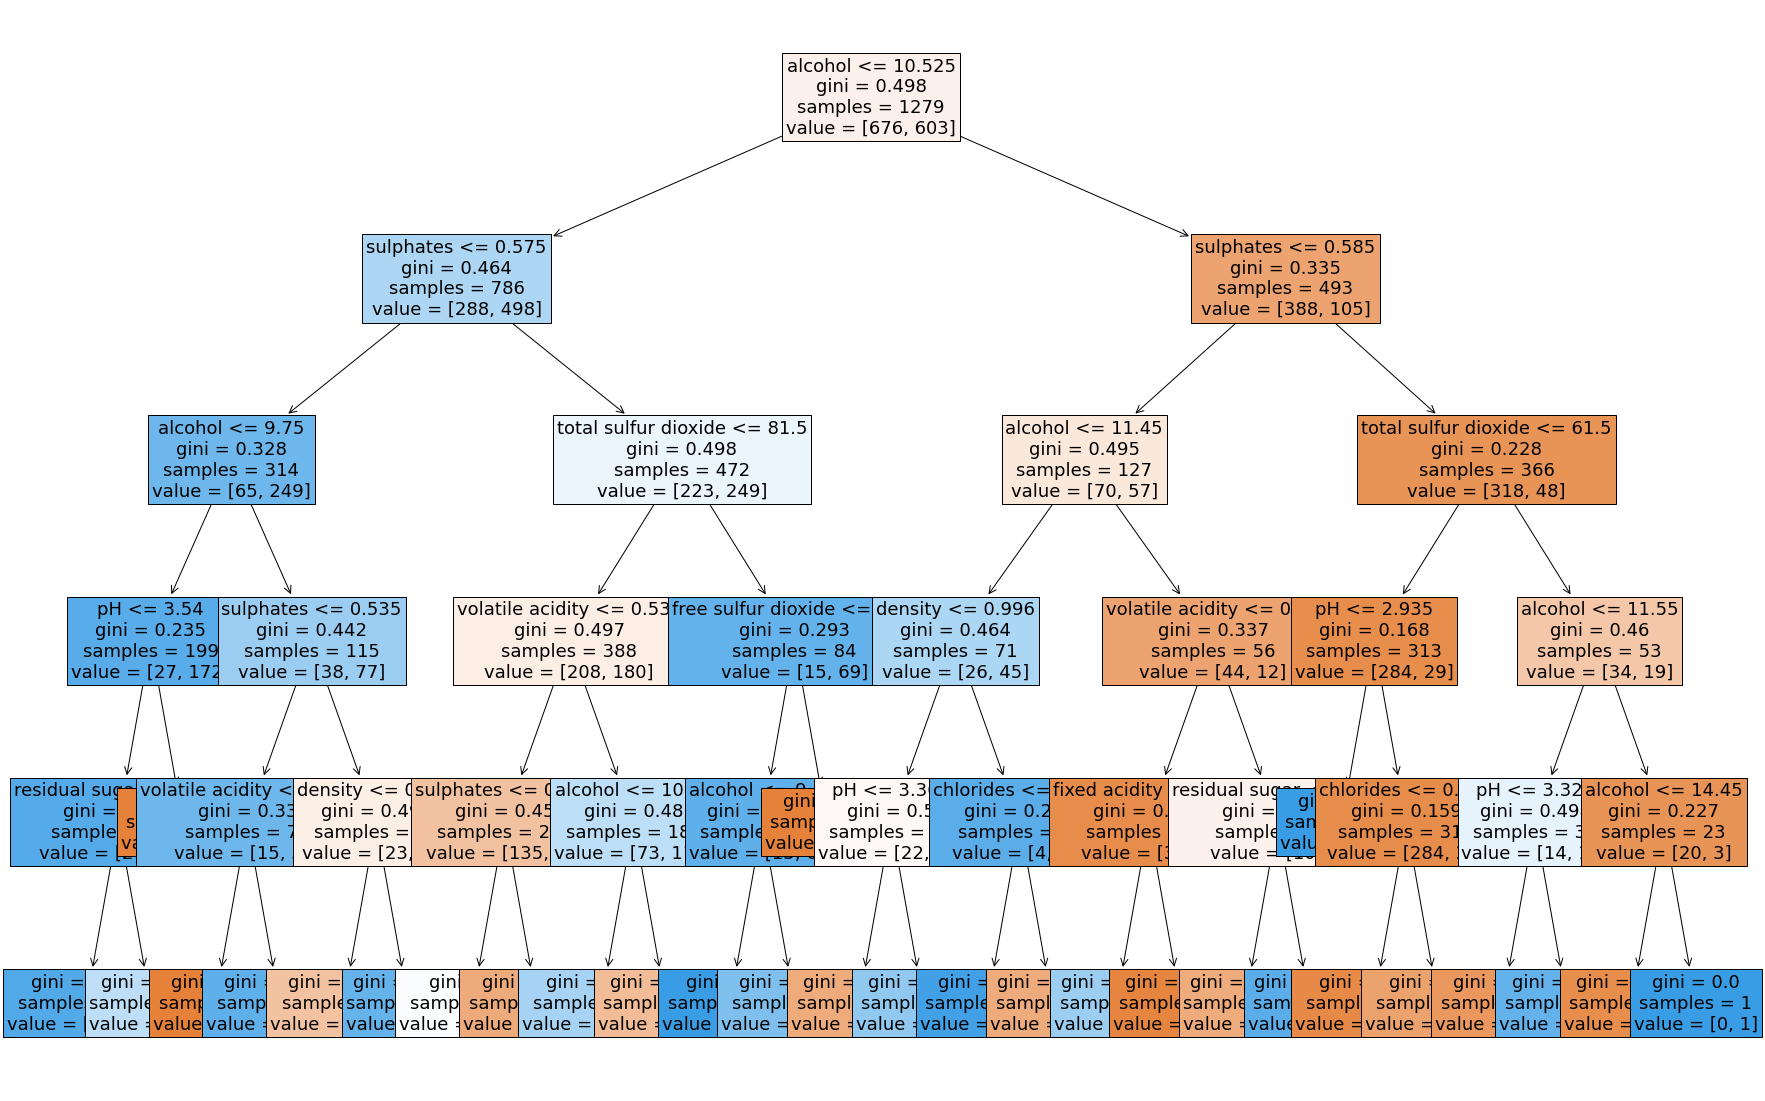

In [40]:
plt.figure(figsize=(30,20))
plot_tree(dt, max_depth=5, filled = True, feature_names=df.columns, fontsize = 18)
plt.show()

## Análise de Desempenho Decision Tree (Aula 05/10)

In [47]:
# imprimir a matriz de confusão
cm = confusion_matrix(y_test, pred_dt)
print(cm)

[[125  54]
 [ 33 108]]


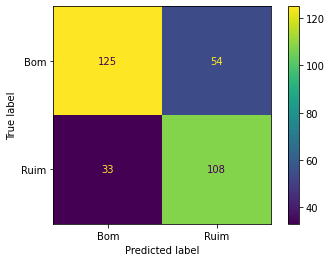

In [50]:
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
DspCM.plot()
plt.show()

> ❗️ Detalhes do Classification_report

Macro avg = 0.5*ScoreBom + 0.5*ScoreRuim

Weighted Avg = (%deBoms)*ScoreBom + (%deRuins)*ScoreRuins

- Apresentar uma conferência dos calculos para reforçar a teoria. Sem detalhar muito, pois já será feito um exercício na aula teórica.

In [51]:
# Relatório

print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

         Bom       0.79      0.70      0.74       179
        Ruim       0.67      0.77      0.71       141

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320



## KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)

In [53]:
knn.fit(X_train_norm, y_train) ##Lembrar de Utilizar Dados Normalizados

KNeighborsClassifier()

In [54]:
pred_knn = knn.predict(X_test_norm)

In [55]:
pred_knn

array(['Ruim', 'Ruim', 'Bom', 'Bom', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Bom',
       'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Ruim', 'Bom',
       'Bom', 'Ruim', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Ruim', 'Ruim',
       'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim',
       'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Bom',
       'Bom', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Ruim', 'Ruim', 'Bom', 'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom',
       'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom', 'Bom', 'Bom',
       'Ruim', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Bom', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Bom',
       'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom', 'Bom', 'Bom', 'Bom',
       'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Bom',
       'Bom', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Ruim'

## Análise de Desempenho KNN (Aula 05/10)

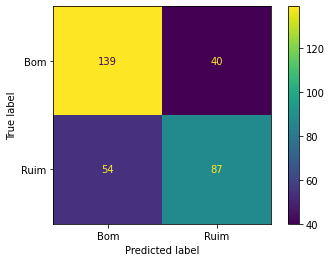

In [56]:
cm = confusion_matrix(y_test, pred_knn)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
DspCM.plot()
plt.show()

In [57]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

         Bom       0.72      0.78      0.75       179
        Ruim       0.69      0.62      0.65       141

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.71      0.70       320



### Teste do KNN sem Dados Normalizados

> Executar caso der tempo

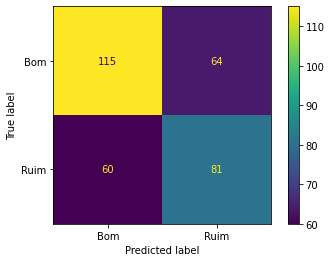

              precision    recall  f1-score   support

         Bom       0.66      0.64      0.65       179
        Ruim       0.56      0.57      0.57       141

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) ##Lembrar de Utilizar Dados Normalizados
pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, pred_knn)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
DspCM.plot()
plt.show()

print(classification_report(y_test, pred_knn))

## Naive Bayes

In [59]:
nb = GaussianNB() ##Utilizar Gaussian porque estamos trabalhando com atributos contínuos. 


In [60]:
nb.fit(X_train_norm, y_train) # Não precisaria ser necessariamente normalizado

GaussianNB()

In [61]:
pred_nb = nb.predict(X_test_norm)

In [62]:
pred_nb

array(['Ruim', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim',
       'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Ruim',
       'Bom', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Ruim',
       'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Ruim',
       'Ruim', 'Bom', 'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim',
       'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Bom',
       'Bom', 'Ruim', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Bom',
       'Bom', 'Bom', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom',
       'Ruim', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Ruim', 'Bom', 'Ruim', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Ruim', 'Bom', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Bom',
       'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Ruim', 'Bom', 'Bom',
       'Ruim', 'Bom', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Bom',
       'Bom', 'Bom', 'Ruim', 'Bom', 'Bom', 'R

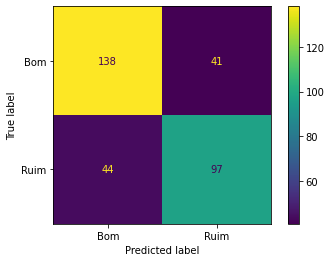

In [64]:
cm = confusion_matrix(y_test, pred_nb)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
DspCM.plot()
plt.show()

In [65]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

         Bom       0.76      0.77      0.76       179
        Ruim       0.70      0.69      0.70       141

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320

